In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [2]:
df_features = pd.read_csv('../data/features.csv')
df_sales = pd.read_csv('../data/sales.csv')
df_stores = pd.read_csv('../data/stores.csv')

In [3]:
df_features['Date'] = pd.to_datetime(df_features['Date'], format='%d/%m/%Y')
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%d/%m/%Y')


In [4]:
df_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [5]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [6]:
df_sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [7]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [8]:
df_stores.columns

Index(['Store', 'Type', 'Size'], dtype='object')

In [9]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [10]:
df_features = df_features.rename(columns={'IsHoliday': 'IsHolidayFeatures'})
df_combined = pd.merge(df_sales, df_stores, on='Store', how='left')
df_final = pd.merge(df_combined, df_features, on=['Store', 'Date'], how='left')
df_final['week'] = df_final['Date'].dt.isocalendar().week
df_final['month'] = df_final['Date'].dt.month
df_final['day'] = df_final['Date'].dt.day
df_final.set_index('Date', inplace=True)
df_final = df_final.sort_index()


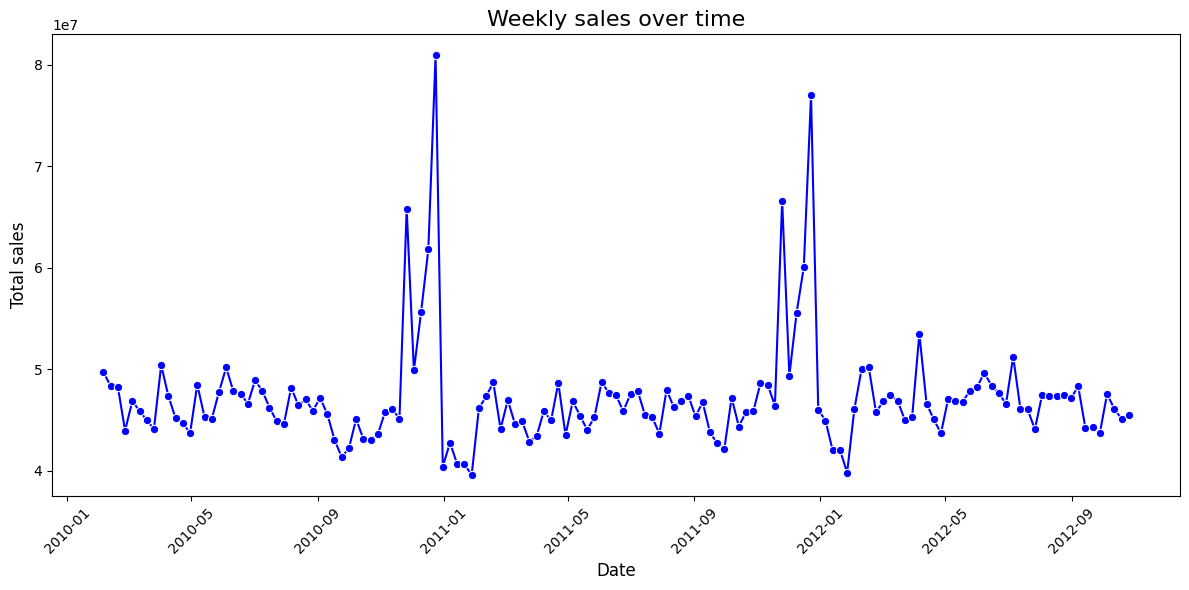

In [11]:

weekly_sales = df_final.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=weekly_sales, x='Date', y='Weekly_Sales', marker='o', color='b')
plt.title('Weekly sales over time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total sales', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
weekly_sales

,Date,Weekly_Sales
0,2010-02-05,49750740.50
1,2010-02-12,48336677.63
2,2010-02-19,48276993.78
3,2010-02-26,43968571.13
4,2010-03-05,46871470.30
...,...,...
138,2012-09-28,43734899.40
139,2012-10-05,47566639.31
140,2012-10-12,46128514.25
141,2012-10-19,45122410.57


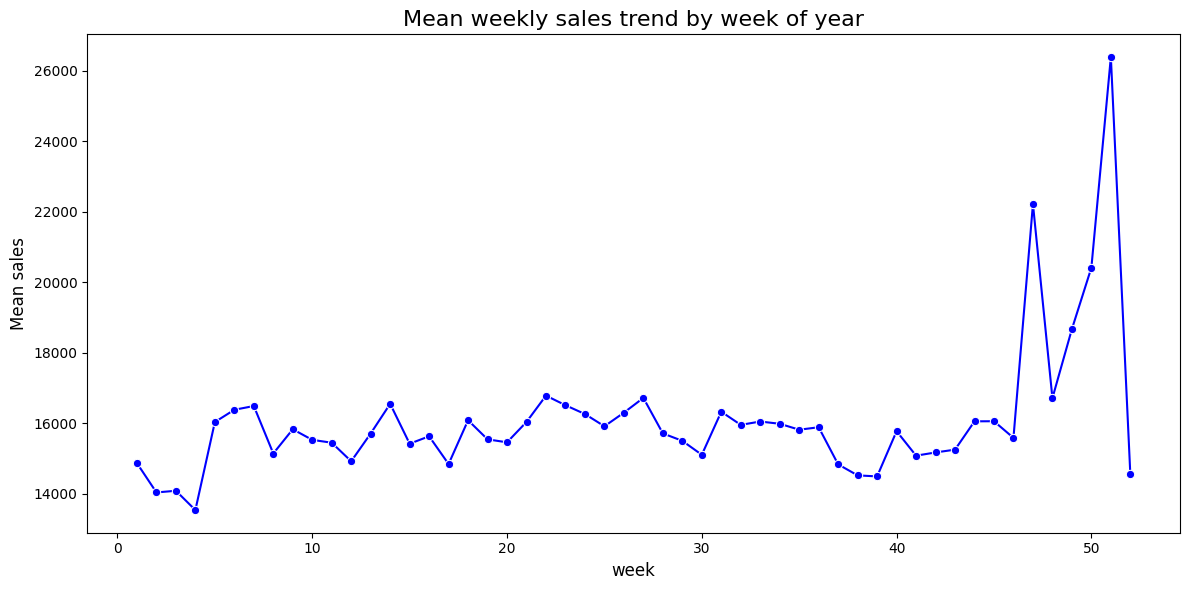

In [13]:
weekly_sales_by_week = df_final.groupby('week')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(12, 6))

sns.lineplot(data=weekly_sales_by_week, x='week', y='Weekly_Sales', marker='o', color='b')

plt.title('Mean weekly sales trend by week of year', fontsize=16)
plt.xlabel('week', fontsize=12)
plt.ylabel('Mean sales', fontsize=12)
plt.tight_layout()
plt.show()

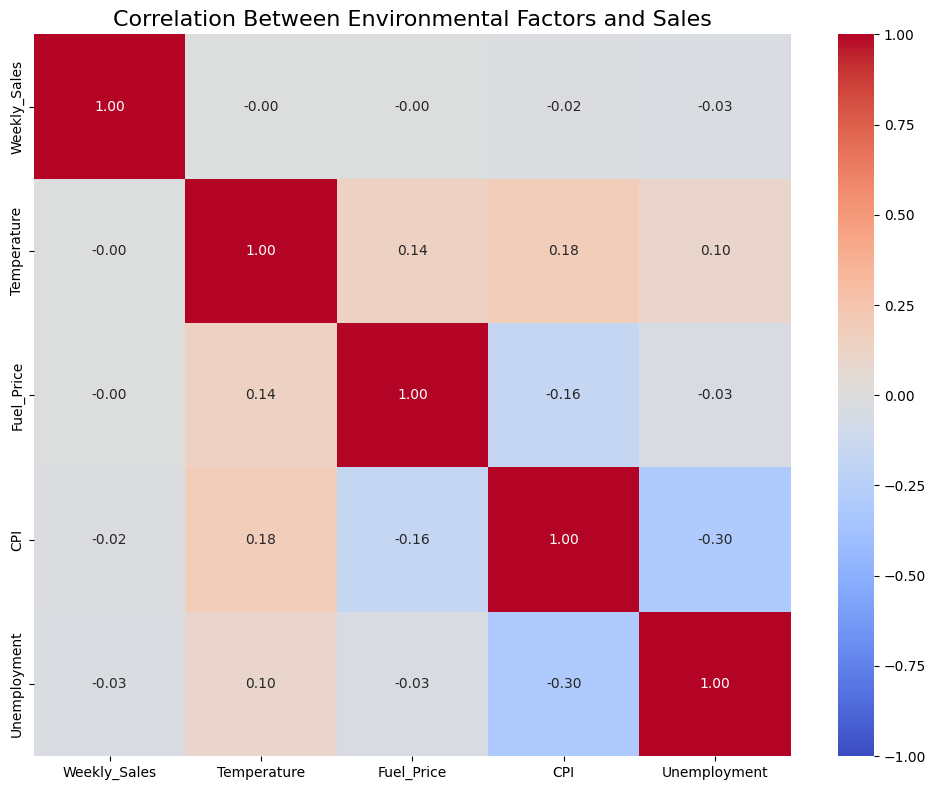

In [14]:
df_corr = df_final[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
correlation_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Between Environmental Factors and Sales', fontsize=16)
plt.tight_layout()
plt.show()

/var/folders/8g/hxdrgzwn3hj4nvsz61s8r23m0000gn/T/ipykernel_54889/3381073573.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_holiday, x='IsHoliday', y='Weekly_Sales', palette='Blues')


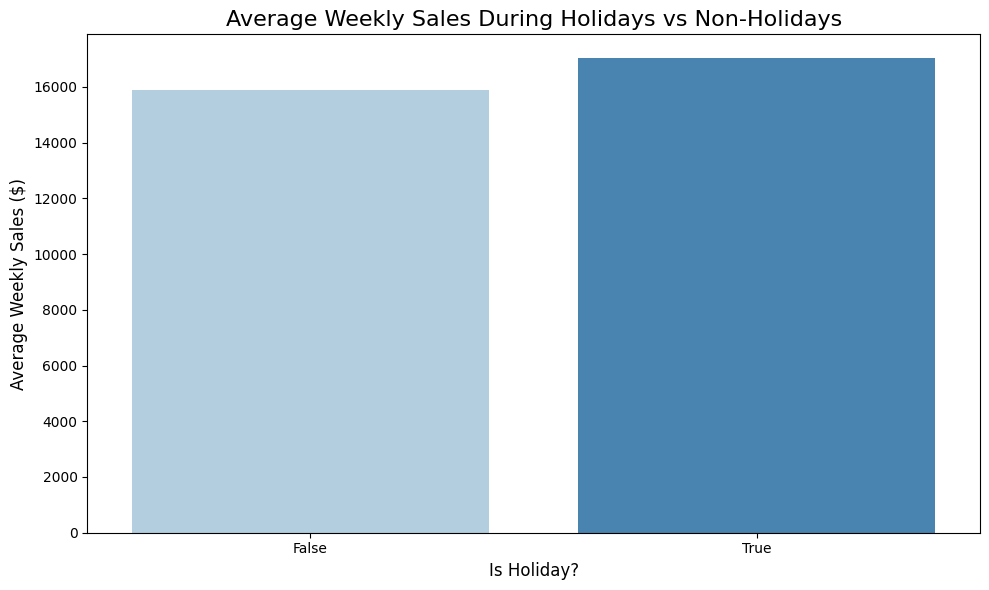

In [15]:
df_final['Total_Discount'] = df_final[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].sum(axis=1)

sales_by_holiday = df_final.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_holiday, x='IsHoliday', y='Weekly_Sales', palette='Blues')
plt.title('Average Weekly Sales During Holidays vs Non-Holidays', fontsize=16)
plt.xlabel('Is Holiday?', fontsize=12)
plt.ylabel('Average Weekly Sales ($)', fontsize=12)
plt.tight_layout()
plt.show()


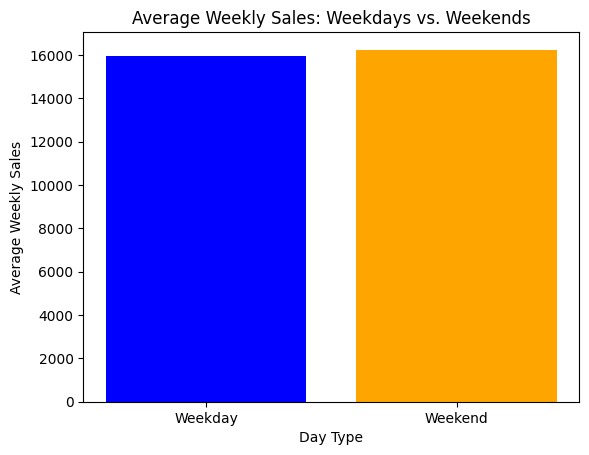

In [16]:
df_final['day_type'] = df_final['day'].apply(lambda x: 'Weekend' if x in [6, 7] else 'Weekday')
avg_sales = df_final.groupby('day_type')['Weekly_Sales'].mean()
plt.bar(avg_sales.index, avg_sales.values, color=['blue', 'orange'])
plt.title('Average Weekly Sales: Weekdays vs. Weekends')
plt.ylabel('Average Weekly Sales')
plt.xlabel('Day Type')
plt.show()
